In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#files on disk
scores_file = 'full_dataset.csv'
features_file = 'features.csv'
time_file = 'transcript_times.csv'

#load files
scores = pd.read_csv(scores_file, index_col=0)
y = scores['PHQ8_Binary'].values
y = scores['PHQ8_Score'].values

features = pd.read_csv(features_file, sep='\t', index_col=0)

time = pd.read_csv(time_file, sep='\t', index_col=0)

In [4]:
print(scores.shape)
print(features.shape)
print(time.shape)

(189, 4)
(189, 8)
(189, 2)


In [7]:
#engineering features
features['px'] = features.p1 - (features.p3 + features.p2)
features['pt'] = features.p1 + features.p3 + features.p2

features['p1/w'] = features.p1 / features.num_words
features['p1/pt'] = features.p1 / features.pt
features['p1/p2'] = features.p1 / features.p2
features['p1/p2p3'] = features.p1 / (features.p2 + features.p3)

features['p1/wps'] = features.p1 / features.wps
features['p/w'] = features.pt / features.num_words

features['wpm'] = features.num_words / time.total_time

In [10]:
#anomalies
p1_mean = features.p1.mean()
p2_mean = features.p2.mean()
words_mean = features.num_words.mean()

features['p1_anom'] = features.p1 - p1_mean
features['p2_anom'] = features.p2 - p2_mean
features['w_anom'] = features.num_words - words_mean

features['p1/p2_anom'] = features.p1_anom / features.p2_anom
features['p1/w_anom'] = features.p1_anom / features.w_anom

#add PHQ8 scores and gender columns for correlation matrix
features['PHQ8_Binary'] = scores['PHQ8_Binary']
features['PHQ8_Score'] = scores['PHQ8_Score']
features['Gender'] = scores['Gender']

Now let's plot various features against the raw and binary scores, and maybe gender, to see how correlated they are with them.

### EDA

In [11]:
features_subset = features.drop('id', axis=1)

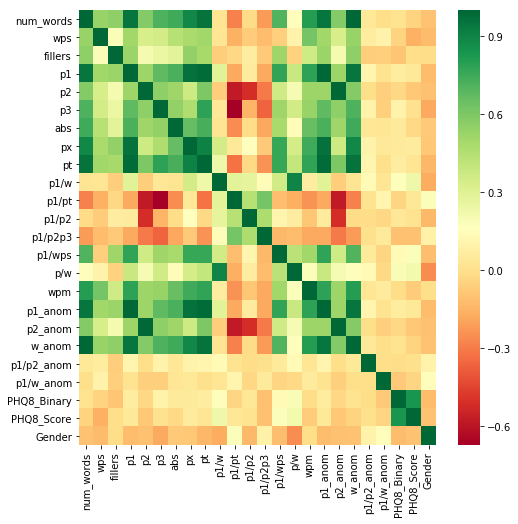

In [12]:
#coreelation matrix
corr = features_subset.corr()

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdYlGn', ax=ax)
plt.show()

In [13]:
corr[['PHQ8_Binary', 'PHQ8_Score']].head(20)

,PHQ8_Binary,PHQ8_Score
num_words,0.014146,-0.041346
wps,-0.042110,-0.161992
fillers,-0.094143,-0.004744
p1,0.063248,0.040127
p2,-0.025680,-0.079977
p3,0.104242,0.008170
abs,0.047461,-0.022999
px,0.048596,0.054913
pt,0.070513,0.028722
p1/w,0.175939,0.232263


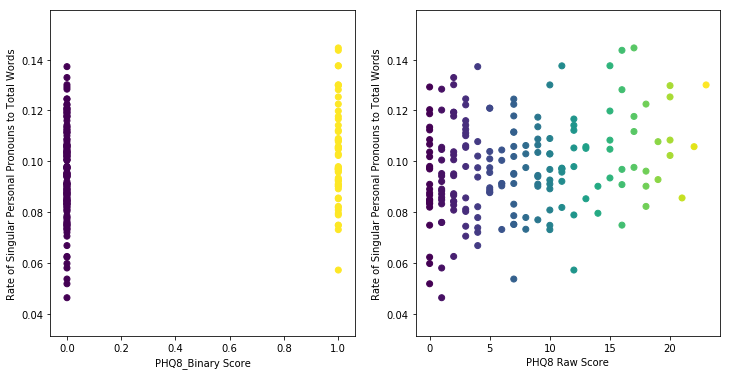

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(features.PHQ8_Binary, features['p1/w'], c=features.PHQ8_Binary)
ax[0].set_xlabel('PHQ8_Binary Score')
ax[0].set_ylabel('Rate of Singular Personal Pronouns to Total Words')

ax[1].scatter(features.PHQ8_Score, features['p1/w'], c=features.PHQ8_Score)
ax[1].set_xlabel('PHQ8 Raw Score')
ax[1].set_ylabel('Rate of Singular Personal Pronouns to Total Words')

plt.show()

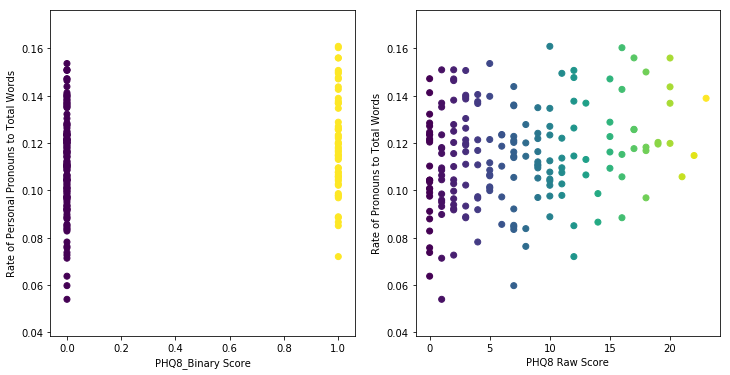

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(features.PHQ8_Binary, features['p/w'], c=features.PHQ8_Binary)
ax[0].set_xlabel('PHQ8_Binary Score')
ax[0].set_ylabel('Rate of Personal Pronouns to Total Words')

ax[1].scatter(features.PHQ8_Score, features['p/w'], c=features.PHQ8_Score)
ax[1].set_xlabel('PHQ8 Raw Score')
ax[1].set_ylabel('Rate of Pronouns to Total Words')

plt.show()

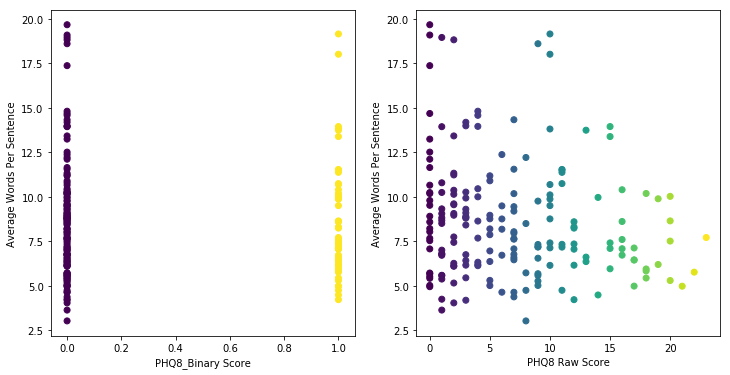

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(features.PHQ8_Binary, features.wps, c=features.PHQ8_Binary)
ax[0].set_xlabel('PHQ8_Binary Score')
ax[0].set_ylabel('Average Words Per Sentence')

ax[1].scatter(features.PHQ8_Score, features.wps, c=features.PHQ8_Score)
ax[1].set_xlabel('PHQ8 Raw Score')
ax[1].set_ylabel('Average Words Per Sentence')

plt.show()